# 1. 이해하기

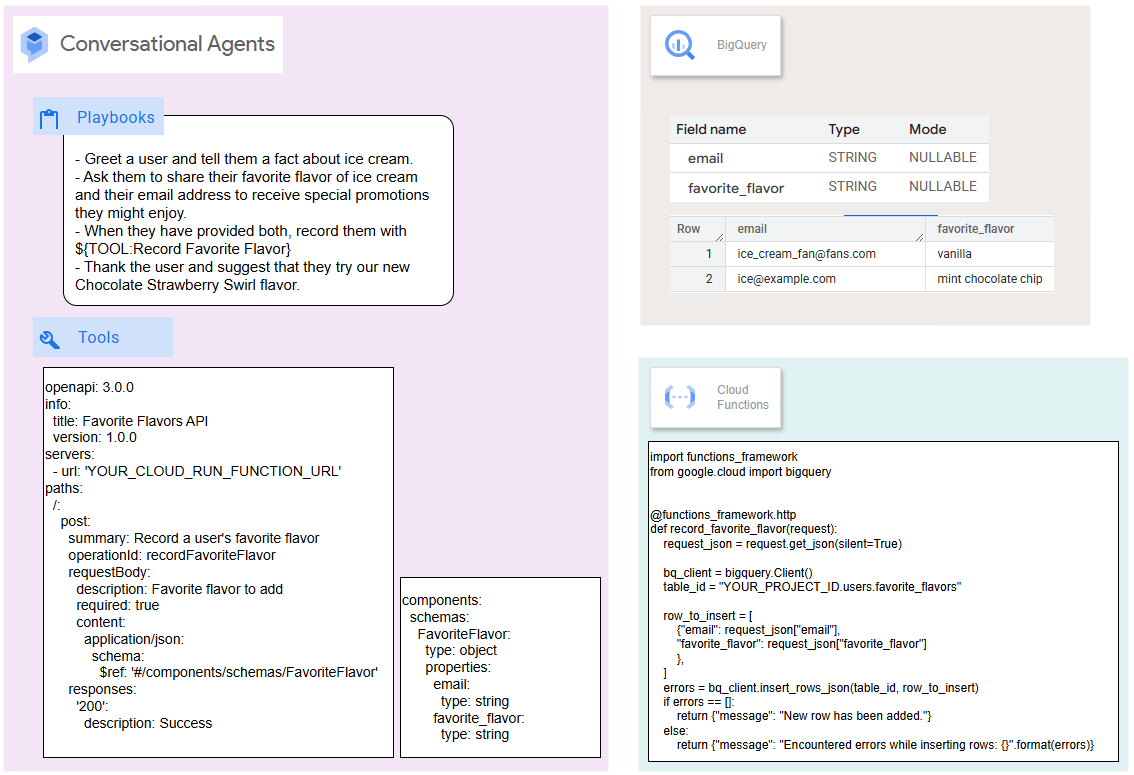

# 2. 구현하기

## 2.1 Bigquery 만들기

### 2.1.1 Dataset 만들기

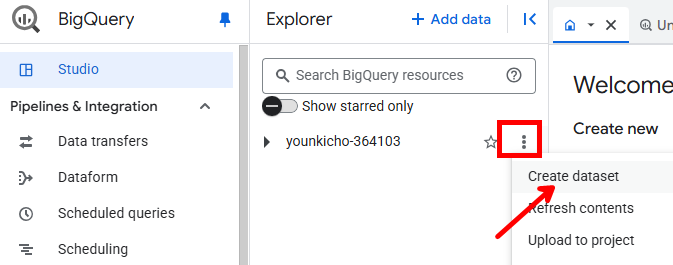

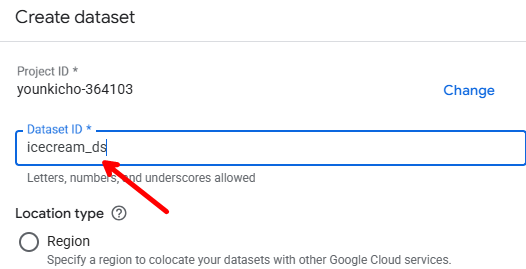

### 2.1.2 table 만들기

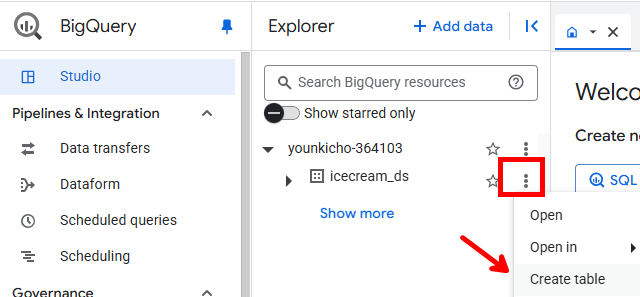

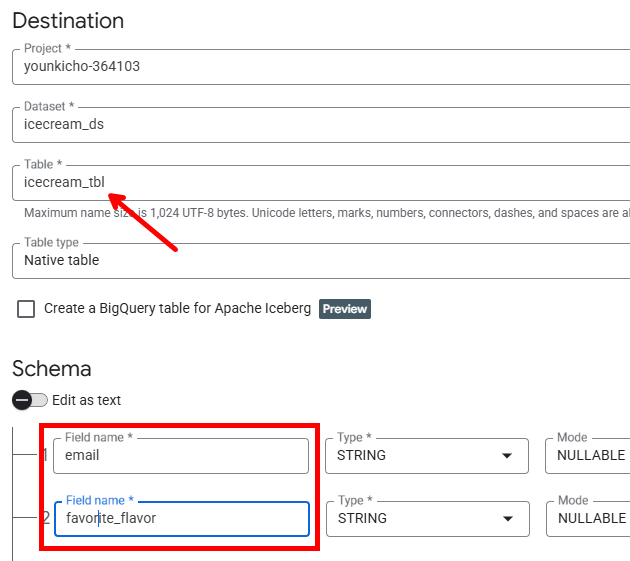

## 2.2 Cloud RUN 만들기

### 2.2.1 Write a function

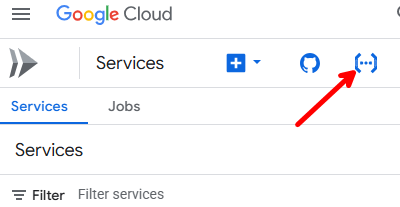

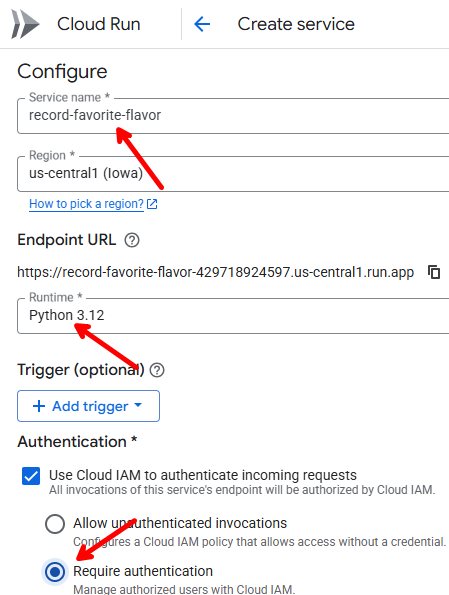

### 2.2.2 requirements.txt

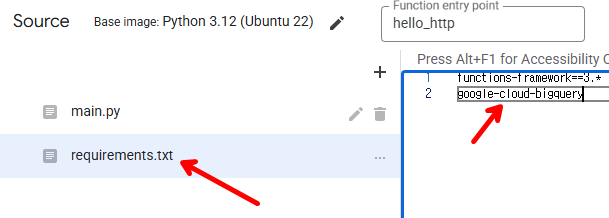

### 2.2.3 main.py



```
import functions_framework
from google.cloud import bigquery

@functions_framework.http
def record_favorite_flavor(request):
  request_json = request.get_json(silent=True)

  bq_client = bigquery.Client()
  table_id = "younkicho-364103.icecream_ds.icecream_tbl"

  row_to_insert = [
    {
      "email":request_json["email"],
      "favorite_flavor":request_json["favorite_flavor"]
    }
  ]

  errors = bq_client.insert_rows_json(table_id, row_to_insert)

  if errors == []:
    return {"message":"New row has been added."}
  else:
    return {"message":"Encountered errors while inserting rows:{}".format(errors)}
```



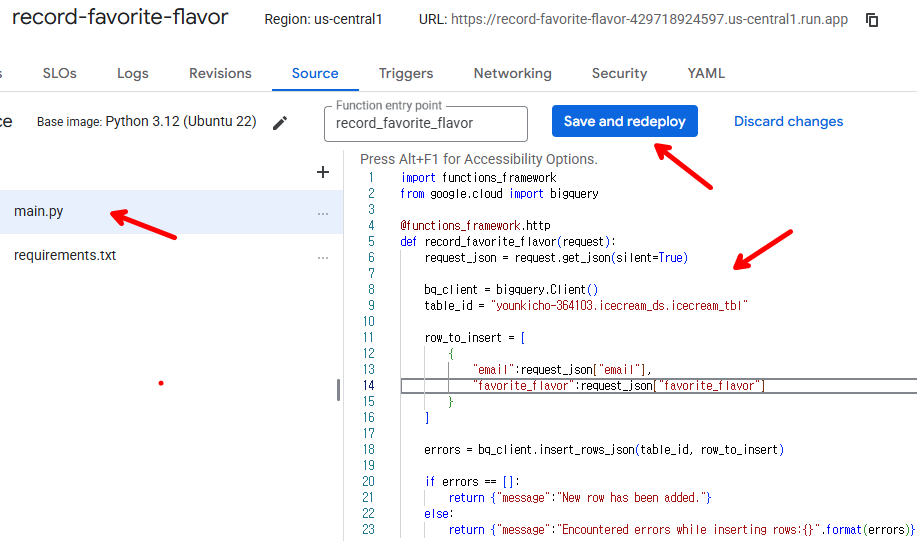

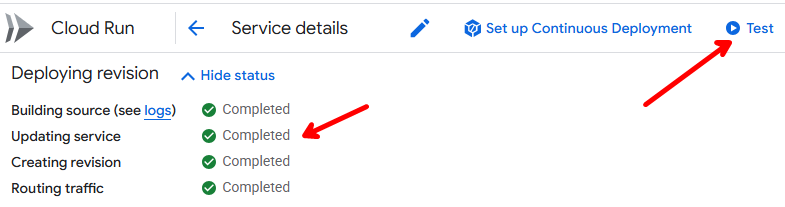



```
{
  "email": "ice_cream_fan@fans.com",
  "favorite_flavor": "vanilla"
}
```



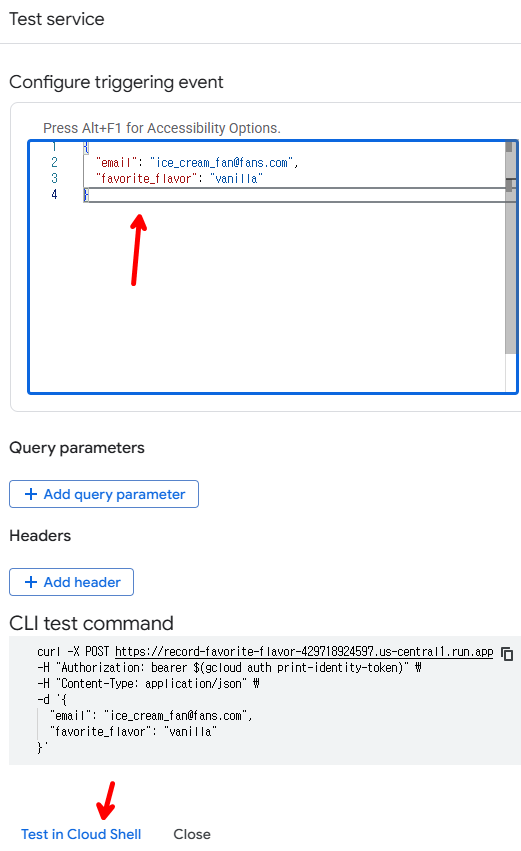

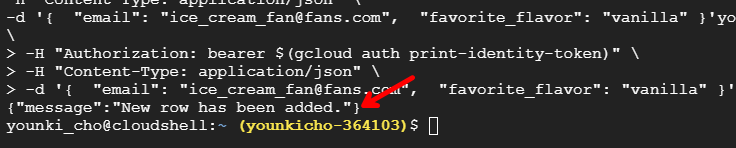

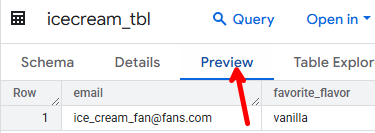

## 2.3 Conversational Agent

### 2.3.1 Agent 만들기

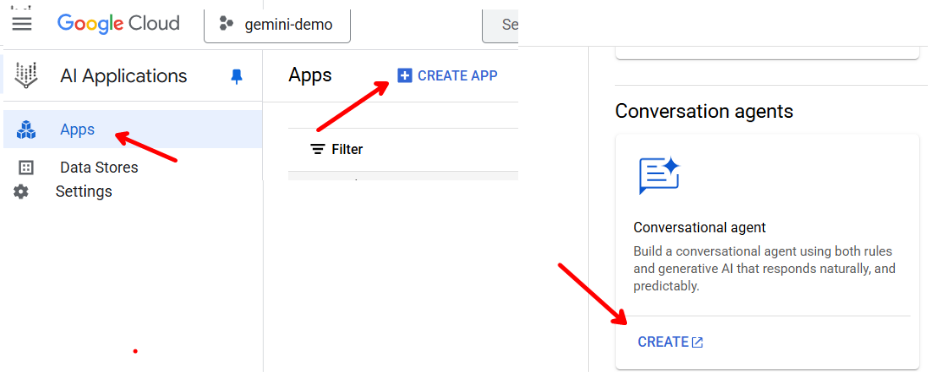

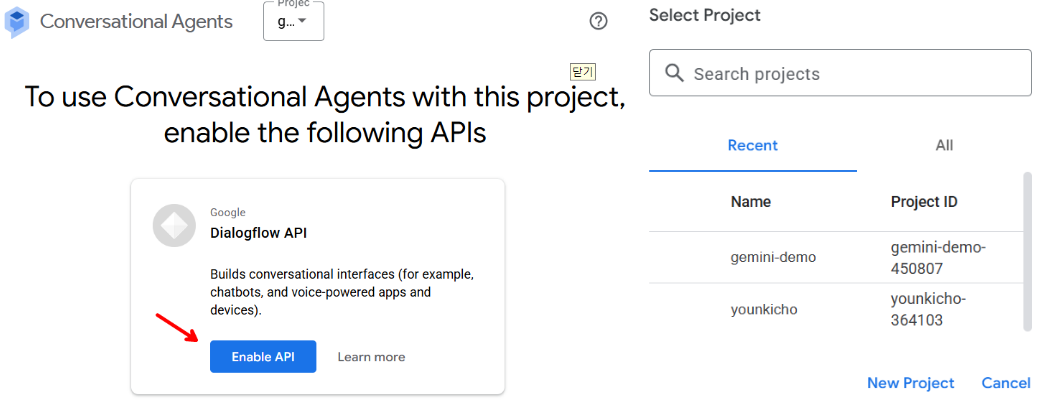

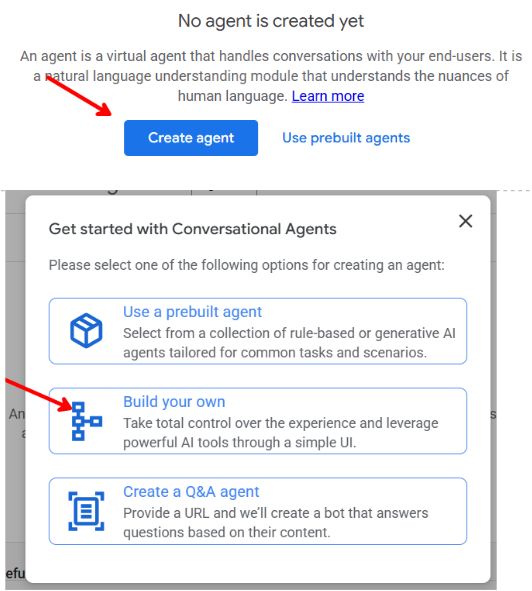

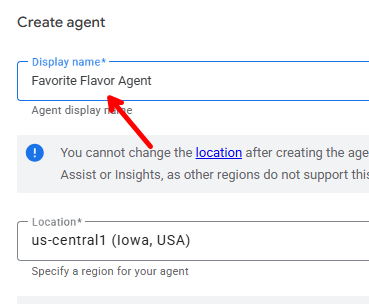

### 2.3.2 Tool 만들기

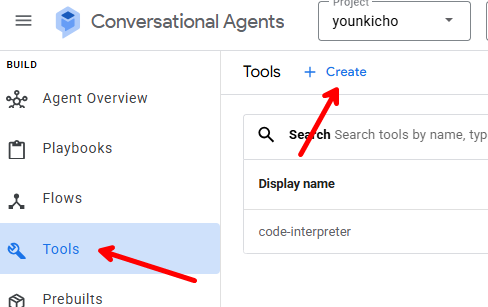



```
openapi: 3.0.0
info:
  title: Favorite Flavors API
  version: 1.0.0
servers:
  - url: 'YOUR_CLOUD_RUN_FUNCTION_URL'
paths:
  /:
    post:
      summary: Record a user's favorite flavor
      operationId: recordFavoriteFlavor
      requestBody:
        description: Favorite flavor to add
        required: true
        content:
          application/json:
            schema:
              $ref: '#/components/schemas/FavoriteFlavor'
      responses:
        '200':
          description: Success
components:
  schemas:
    FavoriteFlavor:
      type: object
      properties:
        email:
          type: string
        favorite_flavor:
          type: string
```



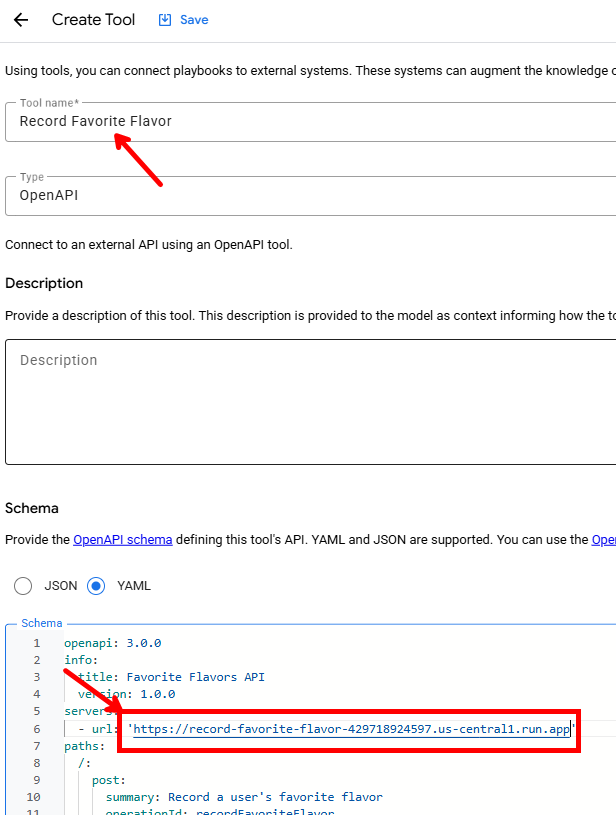

### 2.3.3 IAM

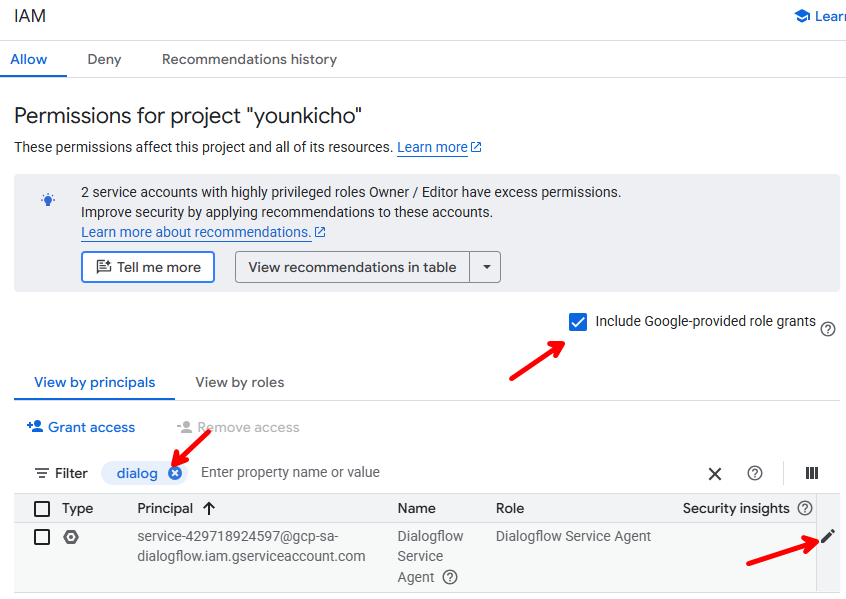

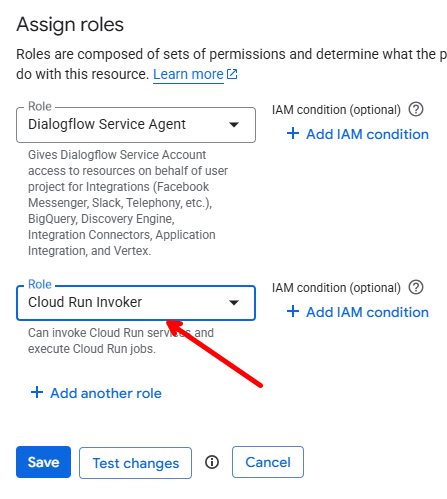

### 2.3.4 playbook

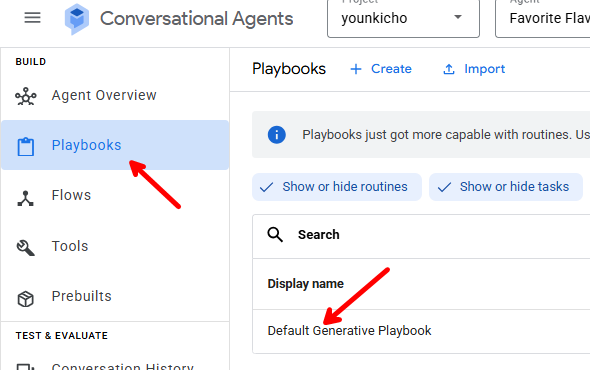


playbook name :
```
Ask for Favorite Flavor
```
Goal :
```
Get users' emails and favorite flavor.
```
instructions :
```
- Greet a user and tell them a fact about ice cream.
- Ask them to share their favorite flavor of ice cream and their email address to receive special promotions they might enjoy.
- When they have provided both, record them with ${TOOL:Record Favorite Flavor}
- Thank the user and suggest that they try our new Chocolate Strawberry Swirl flavor.
```


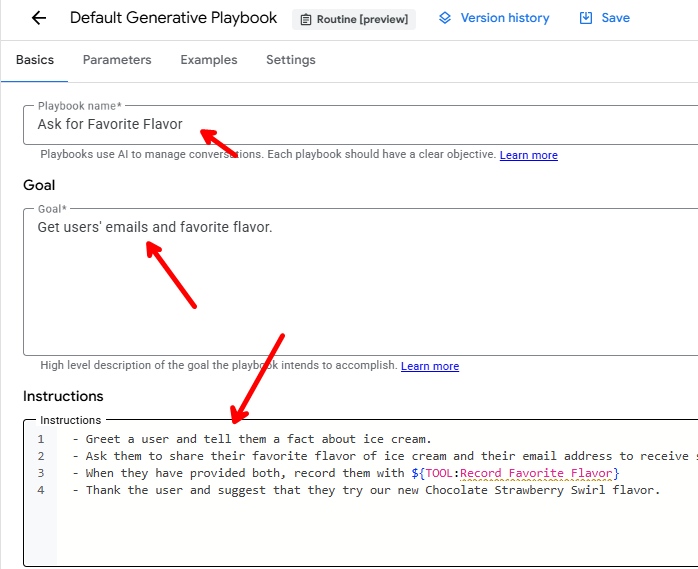

# 3. 실행

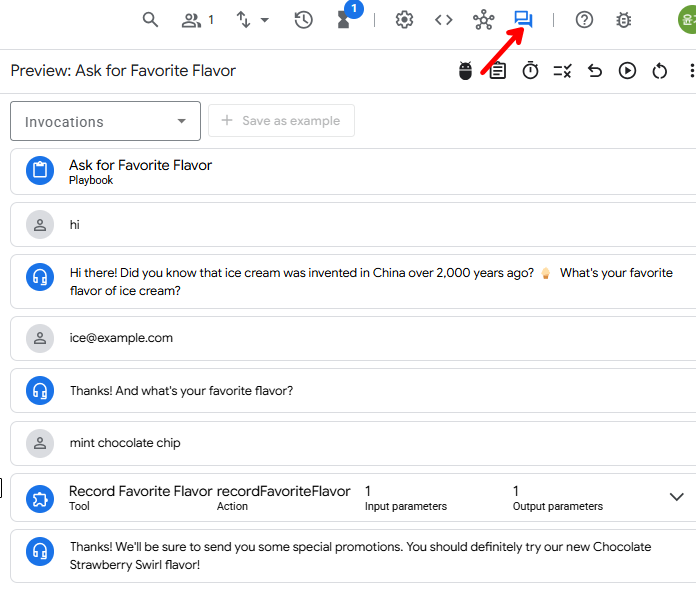